In [31]:
##Import area
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [32]:
def generating_submission_csv(prediction, name=""):
    data = {'Id': [k+1 for k in range(len(prediction))], 'Cover_type': prediction}

    # Créez un DataFrame Pandas à partir du dictionnaire
    predictions_df = pd.DataFrame(data)

    # Enregistrez le DataFrame dans un fichier CSV
    predictions_df.to_csv('predictions_'+name+'.csv', index=False)

In [33]:
# Charger les données depuis un fichier CSV
data = pd.read_csv('data/train.csv')
id = data['Id']
data = data.drop('Id', axis=1)
cover_type = data['Cover_Type']
data = data.drop('Cover_Type', axis=1)

print(data.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2881     130     22                               210   
1       3005     351     14                               242   
2       3226      63     14                               618   
3       3298     317      8                               661   
4       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            250             221             88   
1            194             215            159   
2            232             210   

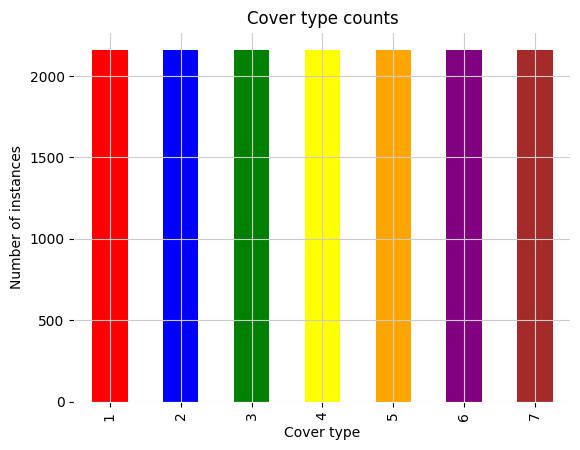

In [23]:
cover_type.value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown'])
plt.ylabel('Number of instances')
plt.xlabel('Cover type')
plt.title('Cover type counts')
plt.show()

Columns with numerical data are Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points

In [24]:
raw_col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
##Normalisation between 0 and 1
for col in raw_col:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

print(data.head())


   Elevation    Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   0.508870  0.361111   0.44                          0.152616   
1   0.571718  0.975000   0.28                          0.175872   
2   0.683730  0.175000   0.28                          0.449128   
3   0.720223  0.880556   0.16                          0.480378   
4   0.609731  0.097222   0.12                          0.127180   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.268085                         0.149934   
1                        0.168794                         0.201529   
2                        0.194326                         0.160517   
3                        0.276596                         0.110539   
4                        0.228369                         0.544613   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.980198        0.787097       0.350598   
1       0.702970        0.748387       0.633466   
2       0.891089       

In [29]:
k = 25
selector = SelectKBest(chi2, k=k)
z = selector.fit_transform(data, cover_type)
filter = selector.get_support()

print("Selected "+str(k)+" features :")
print(data.columns[filter])

Selected 25 features :
Index(['Elevation', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type6',
       'Soil_Type10', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type17', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type35', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import train_test_split
from tqdm import tqdm

k_features = [k for k in range(1, 55)]
n_estimators = [k for k in range(10, 1000, 20)]
max_depth = [k for k in range(1, 100, 1)]

best_params = {'k_f': 0, 'accuracy': 0, 'n_e': 0, 'm_d': 0}

cartesian_product = list(itertools.product(k_features, n_estimators, max_depth))


for params in tqdm(cartesian_product):
    k, n_e, m_d = params
    selector = SelectKBest(chi2, k=k)
    z = selector.fit(data, cover_type)
    data_filtered = data[data.columns[filter]]

    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, cover_type, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=n_e, max_depth=m_d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_params['accuracy']:
        best_params['k_f'] = k
        best_params['accuracy'] = accuracy
        best_params['n_e'] = n_e
        best_params['m_d'] = m_d
        print("New best params with accuracy  = "+ str(accuracy) +":")
        print(best_params)


  0%|          | 0/267300 [00:00<?, ?it/s]


ValueError: Input X must be non-negative.